<a href="https://colab.research.google.com/github/anandkgupt/Machine-Learning-Lab/blob/main/Assignment_Decission_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decission Tree

**Theoretical**

1. What is a Decision Tree, and how does it work?

A Decision Tree is a supervised machine learning algorithm used for both classification and regression. It breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. It consists of:

Root Node: Represents the entire dataset.

Decision Nodes: Feature-based splits.

Leaf Nodes: Output predictions.

2. What are impurity measures in Decision Trees?

Impurity measures quantify the level of disorder or impurity in the node (i.e., how mixed the classes are). Common impurity measures include:

Gini Impurity

Entropy

Mean Squared Error (for regression)

3. What is the mathematical formula for Gini Impurity?

Gini
(
𝑡
)
=
1
−
∑
𝑖
=
1
𝐶
𝑝
𝑖
2
Gini(t)=1−
i=1
∑
C
​
 p
i
2
​

Where:

𝑝
𝑖
p
i
​
  is the proportion of samples of class
𝑖
i at a node.

𝐶
C is the number of classes.

4. What is the mathematical formula for Entropy?
Entropy
(
𝑡
)
=
−
∑
𝑖
=
1
𝐶
𝑝
𝑖
log
⁡
2
(
𝑝
𝑖
)
Entropy(t)=−
i=1
∑
C
​
 p
i
​
 log
2
​
 (p
i
​
 )
Where:

𝑝
𝑖
p
i
​
  is the proportion of class
𝑖
i samples at a node.

𝐶
C is the number of classes.

5. What is Information Gain, and how is it used in Decision Trees?

Information Gain (IG) is the reduction in entropy after a dataset is split on an attribute. It is used to decide which feature to split on at each step in the tree.

IG
(
𝑇
,
𝐴
)
=
Entropy
(
𝑇
)
−
∑
𝑣
∈
𝑉
𝑎
𝑙
𝑢
𝑒
𝑠
(
𝐴
)
∣
𝑇
𝑣
∣
∣
𝑇
∣
⋅
Entropy
(
𝑇
𝑣
)
IG(T,A)=Entropy(T)−
v∈Values(A)
∑
​
  
∣T∣
∣T
v
​
 ∣
​
 ⋅Entropy(T
v
​
 )
6. What is the difference between Gini Impurity and Entropy?

Feature	Gini Impurity	Entropy
Basis	Probability	Information theory
Formula
1
−
∑
𝑝
𝑖
2
1−∑p
i
2
​

−
∑
𝑝
𝑖
log
⁡
2
𝑝
𝑖
−∑p
i
​
 log
2
​
 p
i
​

Performance	Slightly faster	More sensitive to purity
Decision Impact	Often similar trees	Sometimes different splits

7. What is the mathematical explanation behind Decision Trees?

A Decision Tree builds recursively using a greedy algorithm:

At each node, it evaluates all features.

It chooses the one that maximizes Information Gain (or minimizes Gini/Entropy).

Splitting continues until stopping criteria (e.g., max depth, min samples) is met.

8. What is Pre-Pruning in Decision Trees?

Pre-pruning (early stopping) halts tree growth early based on constraints like:

Maximum depth

Minimum samples to split

Minimum impurity decrease

It helps prevent overfitting by controlling tree size.

9. What is Post-Pruning in Decision Trees?

Post-pruning builds the full tree first and then removes branches that do not improve performance (usually validated on a test/validation set). Techniques include:

Cost complexity pruning (used in CART)

Reduced error pruning

10. What is the difference between Pre-Pruning and Post-Pruning?

Feature	Pre-Pruning	Post-Pruning
When Applied	During tree growth	After full tree construction
Advantage	Faster, prevents overgrowth	Often more accurate
Risk	Underfitting	Slower, more resource-intensive

11. What is a Decision Tree Regressor?

A Decision Tree Regressor is used when the target variable is continuous. Instead of using Gini or Entropy, it minimizes variance (or MSE) at each split:

MSE
=
1
𝑛
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
^
)
2
MSE=
n
1
​
  
i=1
∑
n
​
 (y
i
​
 −
y
^
​
 )
2

12. What are the advantages and disadvantages of Decision Trees?

Advantages:

Easy to interpret and visualize

Handles both numerical and categorical features

Requires little preprocessing

Disadvantages:

Prone to overfitting (especially deep trees)

Unstable to small variations in data

Biased toward features with more levels

13. How does a Decision Tree handle missing values?

Handling depends on the implementation:

scikit-learn: Requires explicit imputation

CART: Uses surrogate splits (alternative features for missing data)

14. How does a Decision Tree handle categorical features?

scikit-learn: Requires encoding (e.g., one-hot or label encoding)

CatBoost: Handles categorical variables natively

Some trees split on categories directly if supported

15. What are some real-world applications of Decision Trees?

Healthcare: Disease diagnosis

Finance: Credit scoring, risk assessment

Marketing: Customer segmentation

Education: Student performance prediction

E-commerce: Recommendation systems

**Practical**

In [1]:
#16 Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")


Decision Tree Classifier Accuracy: 1.00


In [2]:
#17 Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier using Gini Impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Print feature importances
importances = clf.feature_importances_
print("Feature Importances using Gini Impurity:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


Feature Importances using Gini Impurity:
sepal length (cm): 0.0000
sepal width (cm): 0.0167
petal length (cm): 0.9061
petal width (cm): 0.0772


In [3]:
#18 Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier using Entropy
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy using Entropy: {accuracy:.4f}")


Model Accuracy using Entropy: 1.0000


In [4]:
#19 Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.4952


In [5]:
#20 Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Export the tree to Graphviz format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize the tree
graph = graphviz.Source(dot_data)
graph.render("iris_tree", view=True)  # Saves and opens the visualization as PDF


'iris_tree.pdf'

In [6]:
#21 Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Decision Tree with max depth = 3
dt_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth3.fit(X_train, y_train)
y_pred_depth3 = dt_depth3.predict(X_test)
accuracy_depth3 = accuracy_score(y_test, y_pred_depth3)

# Model 2: Fully grown Decision Tree
dt_full = DecisionTreeClassifier(random_state=42)  # No max_depth means full tree
dt_full.fit(X_train, y_train)
y_pred_full = dt_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Print the accuracies
print(f"Accuracy (max depth = 3): {accuracy_depth3:.4f}")
print(f"Accuracy (fully grown tree): {accuracy_full:.4f}")


Accuracy (max depth = 3): 1.0000
Accuracy (fully grown tree): 1.0000


In [7]:
#22 Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Decision Tree with min_samples_split = 5
dt_min_samples = DecisionTreeClassifier(min_samples_split=5, random_state=42)
dt_min_samples.fit(X_train, y_train)
y_pred_min_samples = dt_min_samples.predict(X_test)
accuracy_min_samples = accuracy_score(y_test, y_pred_min_samples)

# Model 2: Default Decision Tree
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)
y_pred_default = dt_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

# Print the accuracies
print(f"Accuracy (min_samples_split = 5): {accuracy_min_samples:.4f}")
print(f"Accuracy (default): {accuracy_default:.4f}")


Accuracy (min_samples_split = 5): 1.0000
Accuracy (default): 1.0000


In [8]:
#23 Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree on unscaled data
clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train, y_train)
y_pred_unscaled = clf_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Apply StandardScaler (Feature Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree on scaled data
clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# Print comparison of accuracy
print(f"Accuracy on unscaled data: {acc_unscaled:.4f}")
print(f"Accuracy on scaled data:   {acc_scaled:.4f}")


Accuracy on unscaled data: 1.0000
Accuracy on scaled data:   1.0000


In [9]:
#24 Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply One-vs-Rest strategy with Decision Tree Classifier
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = ovr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy using One-vs-Rest Decision Tree Classifier:", round(accuracy, 4))


Accuracy using One-vs-Rest Decision Tree Classifier: 1.0


Feature Importance Scores:
             Feature  Importance
2  petal length (cm)    0.906143
3   petal width (cm)    0.077186
1   sepal width (cm)    0.016670
0  sepal length (cm)    0.000000


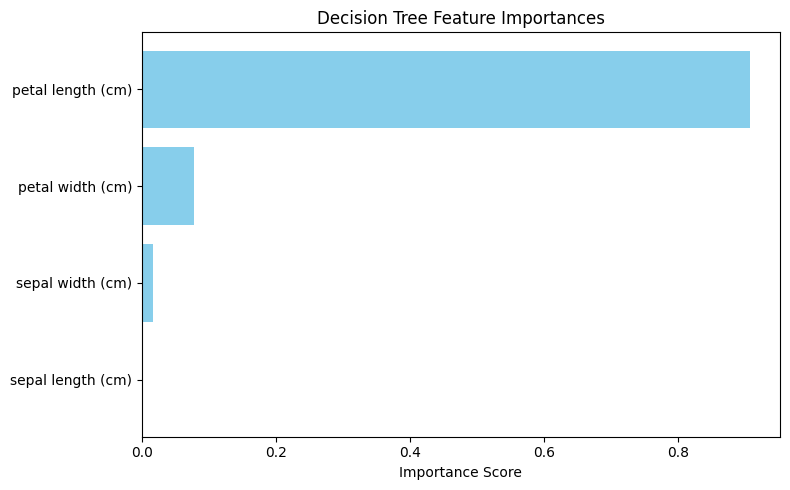

In [10]:
#25  Write a Python program to train a Decision Tree Classifier and display the feature importance scores
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the importance scores
print("Feature Importance Scores:")
print(feature_importance_df)

# Optional: Visualize feature importances
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Decision Tree Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [11]:
#26 Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor with max_depth=5
reg_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_limited.fit(X_train, y_train)
y_pred_limited = reg_limited.predict(X_test)
mse_limited = mean_squared_error(y_test, y_pred_limited)

# Train an unrestricted Decision Tree Regressor
reg_full = DecisionTreeRegressor(random_state=42)
reg_full.fit(X_train, y_train)
y_pred_full = reg_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

# Print and compare results
print("Decision Tree Regressor with max_depth=5 - MSE:", round(mse_limited, 4))
print("Unrestricted Decision Tree Regressor - MSE:", round(mse_full, 4))

if mse_limited < mse_full:
    print("\n✅ The limited-depth tree generalizes better (lower test error).")
else:
    print("\n⚠️ The full tree might be overfitting (higher test error).")


Decision Tree Regressor with max_depth=5 - MSE: 0.5245
Unrestricted Decision Tree Regressor - MSE: 0.4952

⚠️ The full tree might be overfitting (higher test error).


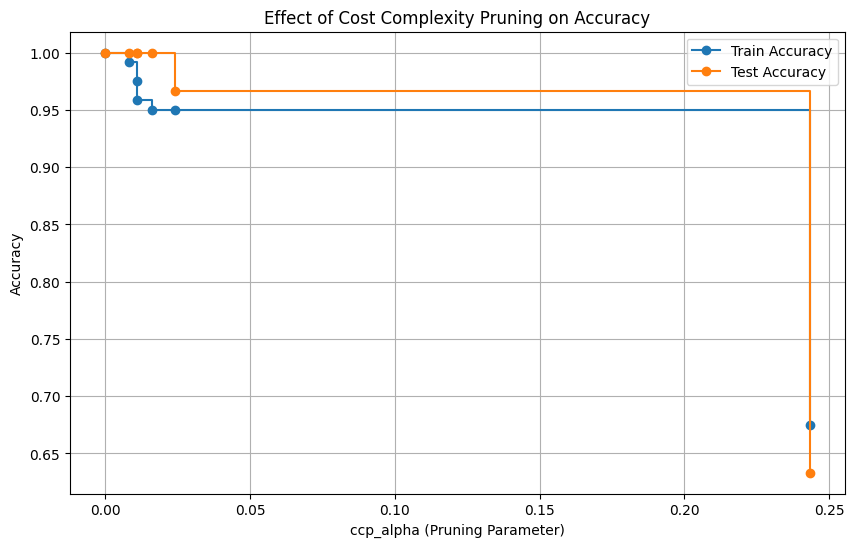

In [12]:
#27 Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a base tree to get effective alphas
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train trees for each value of alpha
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last tree (usually underfits)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Calculate train and test accuracy for each model
train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel("ccp_alpha (Pruning Parameter)")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning on Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
#28 Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load dataset (Iris for multiclass classification)
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate using Precision, Recall, and F1-Score (macro for multiclass)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print metrics
print("Precision (macro):", round(precision, 4))
print("Recall (macro):", round(recall, 4))
print("F1-Score (macro):", round(f1, 4))

# Optional: Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision (macro): 1.0
Recall (macro): 1.0
F1-Score (macro): 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



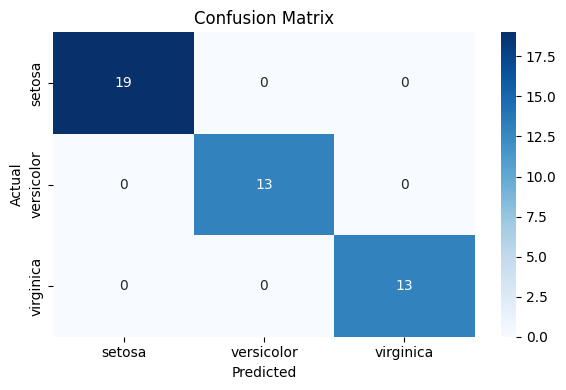

In [14]:
#29 Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset (Iris dataset)
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [15]:
#30 Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10]
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': 4, 'min_samples_split': 10}
Test Accuracy: 1.0
